# 7.4. 와인 품질 데이터 탐색적 분석 실습

# 산점도 행렬

- 스캐터 플롯을 이용해 산점도 행렬 만들기

In [1]:
# 와인 데이터 가져오기
import pandas as pd

URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
redwine = pd.read_csv(URL + "winequality-red.csv", sep=";", header=0)
redwine["type"] = "red"
whitewine = pd.read_csv(URL + "winequality-white.csv", sep=";", header=0)
whitewine["type"] = "white"
wine = redwine.append(whitewine)
wine.columns = wine.columns.str.replace(" ", "_")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 산점도 행렬을 위한 데이터 준비

In [2]:
red_sample = wine.loc[wine["type"] == "red", :]
white_sample = wine.loc[wine["type"] == "white", :]

In [5]:
# red sample 확인
red_sample.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
import numpy as np

red_idx = np.random.choice(red_sample.index, replace=True, size=200)
white_idx = np.random.choice(white_sample.index, replace=True, size=200)

- 산점도를 깔끔하게 그리기 위해 여러 기능 변수와 관련된 데이터를 사용하는 경우 데이터 사이즈 조절이 필요함

In [8]:
wine_sample = red_sample.loc[red_idx, ].append(white_sample.loc[white_idx, ])
wine_sample.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1388,6.6,0.64,0.31,6.1,0.083,7.0,49.0,0.99718,3.35,0.68,10.3,5,red
334,7.9,0.65,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7,7,red
262,8.0,0.52,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0,5,red
1573,6.0,0.58,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red


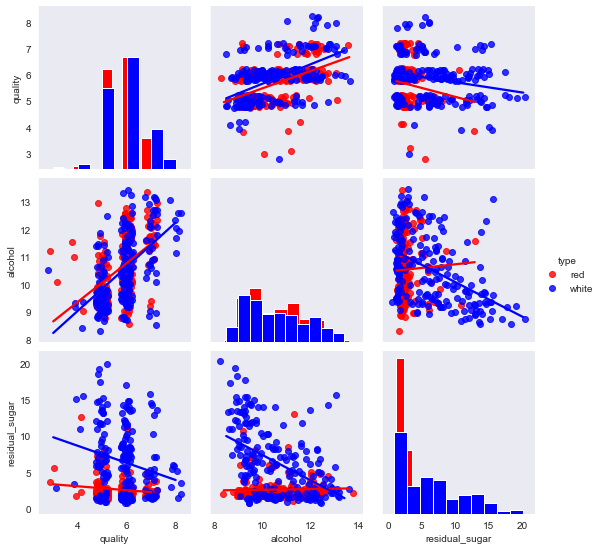

In [10]:
# 페어 플롯 그리기
import seaborn as sns

sns.set_style("dark")
sns.pairplot(wine_sample, vars=["quality", "alcohol", "residual_sugar"],
            kind="reg", plot_kws={"ci": False, "x_jitter": 0.25, "y_jitter": 0.25},
            diag_kind="hist", diag_kws={"bins": 10, "alpha": 1},
            hue="type", palette=dict(red="red", white="blue", markers=["o", "s"]));

- sns.pairplot()

    - pairplot은 히스토그램과 스캐터플롯, 2개의 그림을 그려줌

    - kind: regression(reg)을 지정하면 회귀선과 관련된 부분을 표시해서 전체적인 경향성 파악 가능

### 산점도 행렬의 히스토그램과 회귀선

- 히스토그램

    - 알코올 도수의 평균과 표준편차는 두 그룹이 비슷함

    - 잔여당의 평균과 표준편차는 화이트와인이 더 큼

- 회귀선

    - 알코올 도수가 증가하면 품질이 높아짐

    - 잔여당이 증가하면 품질이 낮아짐

# 실습1

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
redwine = pd.read_csv(URL + "winequality-red.csv", sep=";", header=0)
whitewine = pd.read_csv(URL + "winequality-white.csv", sep=";", header=0)

In [15]:
# type 추가
redwine["type"] = "red"
whitewine["type"] = "white"

In [16]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [17]:
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [18]:
print(redwine.shape)
print(whitewine.shape)

(1599, 13)
(4898, 13)


In [19]:
# red와 white를 하나 만들기
wine = redwine.append(whitewine)

In [23]:
wine.shape

(6497, 13)

In [24]:
# 와인 전체의 요약 통계량 확인하기_describe
# 연속형 데이터만 보임
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [25]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [29]:
# 와인 종류별 요약 통계량 확인_groupby
# type별 quality 확인
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [31]:
wine.groupby("type")["quality"].quantile([0.25, 0.5, 0.75]).unstack("type")

type,red,white
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0


In [34]:
# 와인 종류별 quality t-검정
# 그룹별 집합 함수들에 대한 결과 확인하기_aggregate function
wine.groupby("type")["quality"].aggregate(["std", "mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [37]:
import statsmodels.api as sm

In [38]:
red_q = wine.loc[wine["type"] == "red", "quality"]
white_q = wine.loc[wine["type"] == "white", "quality"]

In [39]:
# t통계량, p-value, df
sm.stats.ttest_ind(red_q, white_q)

(-9.68564955418768, 4.888069044202279e-22, 6495.0)

In [40]:
# p-value
p_val = sm.stats.ttest_ind(red_q, white_q)[1]
p_val <= 0.05

True

- 귀무가설 기각: 레드 와인과 화이트 와인의 품질에 차이가 있다.

In [41]:
# 와인 조류별 quality 관련 상관 분석
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [43]:
wine.corr()[["quality"]]

,quality
fixed acidity,-0.076743
volatile acidity,-0.265699
citric acid,0.085532
residual sugar,-0.036980
chlorides,-0.200666
free sulfur dioxide,0.055463
total sulfur dioxide,-0.041385
density,-0.305858
pH,0.019506
sulphates,0.038485


- \[\[ \]\] 를 이용하면 DataFrame으로 보임

In [54]:
wine_corr = wine.corr()
wine_corr.loc[wine_corr["quality"] > 0, "quality"]

# 상관관계가 가장 큰 요소
wine_corr.loc[(np.abs(wine_corr["quality"]) > 0.3) & (np.abs(wine_corr["quality"]) != 1), "quality"]

density   -0.305858
alcohol    0.444319
Name: quality, dtype: float64

<br/>

### Reference

https://kbig.kr/portal//kbig/datacube/onl_edu_class/python?bltnNo=11583395976711